In [1]:
import xarray as xr
from icechunk import Repository, Storage

In [2]:
storage_config = Storage.new_local_filesystem("icechunk-test")
repo = Repository.open(storage_config)
session = repo.readonly_session(branch="main")

In [3]:
hls_ds = xr.open_zarr(session.store, consolidated=False)
hls_ds

<xarray.Dataset> Size: 576MB
Dimensions:      (time: 12, y: 2000, x: 2000)
Coordinates:
  * x            (x) float64 16kB 1.5e+05 1.502e+05 ... 3.498e+05 3.5e+05
  * y            (y) float64 16kB 2.85e+06 2.85e+06 ... 2.65e+06 2.65e+06
    spatial_ref  int32 4B ...
  * time         (time) datetime64[ns] 96B 2024-01-31 2024-02-29 ... 2024-12-31
Data variables:
    red          (time, y, x) float32 192MB dask.array<chunksize=(1, 500, 500), meta=np.ndarray>
    green        (time, y, x) float32 192MB dask.array<chunksize=(1, 500, 500), meta=np.ndarray>
    blue         (time, y, x) float32 192MB dask.array<chunksize=(1, 500, 500), meta=np.ndarray>

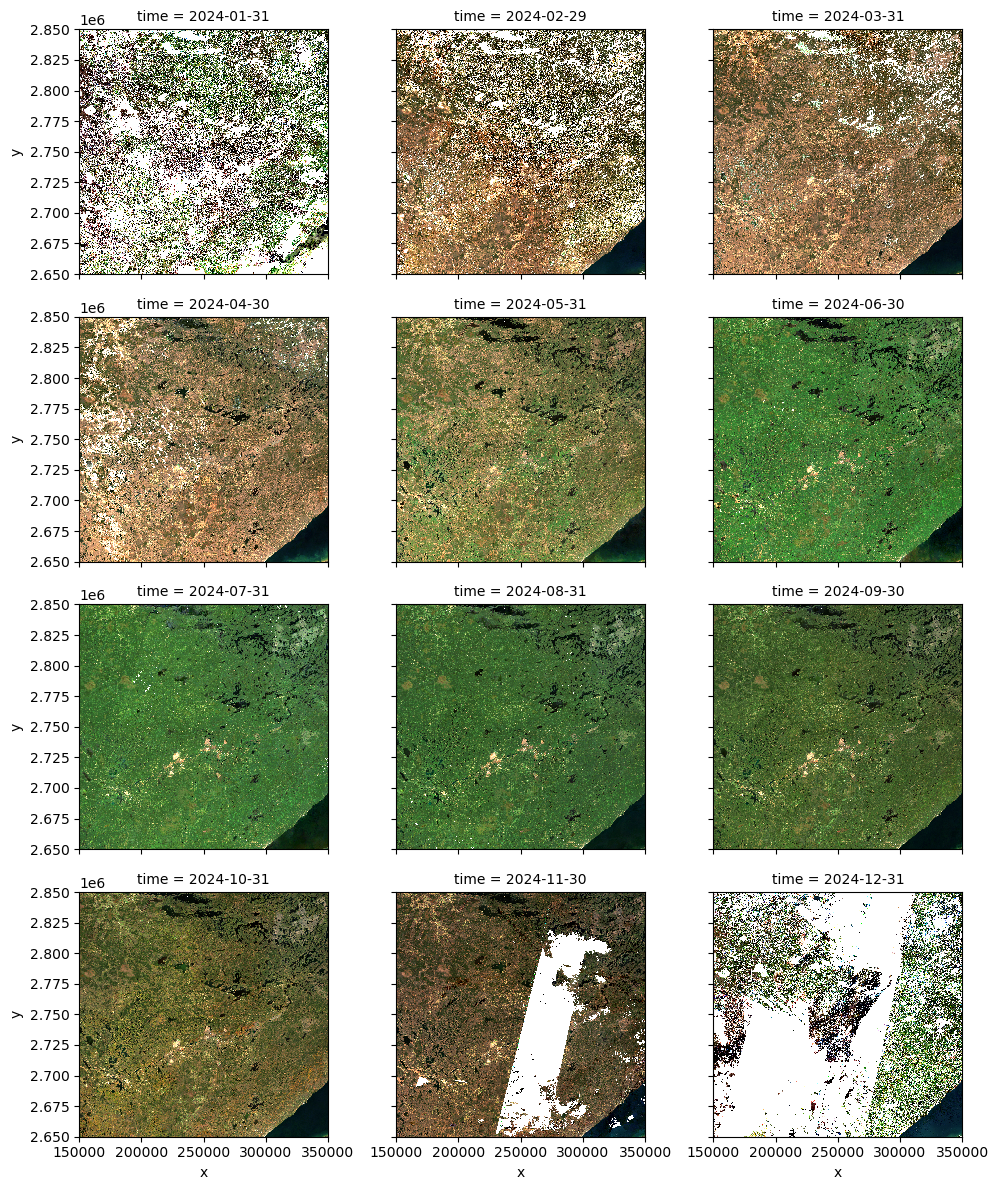

In [4]:
(
    hls_ds.to_dataarray(dim="band").sel(
        band=["red", "green", "blue"]
    ).plot.imshow(
        rgb="band",
        col="time",
        col_wrap=3,
        robust=True,
        vmin=0,
        vmax=1000,
    )
)